Самостоятельное задание 
1. Сделать единую бд sqlite3 из 3х представленных файлов. Выгрузить полученную бд в 
датафрейм. Можно использовать метод PD.READ_SQL.
2. Создать столбец exp - содержащий среднее значение лет опыта. Создать столбец sal - 
содержащий среднее значение лет зп в рублях
3. Построить ящичковые диаграммы по зп в разрезе региона.  6. Построить ящичковые 
диаграммы по зп в разрезе навыков. 
4. Проверить  наличие  зависимости  зп  от  опыта. Проверить  наличие  зависимости  
занятости от региона. Здесь и далее, можно использовать библиотеку SCIPY и её модуль 
STATS,  для  проведения  статистических  тестов  –  Т-тестов  (Стьюдента),  теста  Хи-
квадрат (Пирсона) и т.п.
5. Выделить  из  названий  вакансий  две  группы  -  Seniors  (ведущий,  старший)  и  Others. 
Можно  использовать  метод  DF.MAP и  строковые  функции  питона,  такие  как 
REPLACE.
6. Проверить наличие зависимости   зп от групп.
7. C помощью PANDAS создайте датафрейм из 1 млн. строк, содержащий 4 столбца – пол, 
возраст,  доход,  профессия.  В  категориальной  переменной  профессия  сделайте  3-4 
категории, в переменной пол – 2, возраст и доход сделайте количественными, с типом 
INT.  Для  генерации  этих  столбцов  используйте  методы  NP.RANDOM.NORMAL, NP.RANDOM.CHOICE.
8. Замерьте  объем  памяти  датафрейма  в  памяти  с  помощью  методов  DF.INFO(), 
DF.MEMORY_USAGE()
9. Сохраните датафрейм в формате  CSV, загрузите его в новый датафрейм и замерьте скорость записи и чтения, с помощью «магической» команды  %%TIMEIT.
10. В качестве агрегации надо рассчитать средний возраст, максимальный доход, самый 
частый пол, самый редкий тип профессии. Замерьте время выполнения этих операций с 
помощью «магической» команды  %%TIMEIT. 

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import re
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, pearsonr

In [2]:
lst = []
lst.append(pd.read_csv('data/lab2_data/test1.csv', delimiter='\t'))
lst.append(pd.read_csv('data/lab2_data/test2.csv', delimiter='\t'))
with sqlite3.connect('data/lab2_data/test3.db') as conn:
    df3 = pd.read_sql("SELECT * from vacancies", conn)
    df3.rename(columns={"опыт'": 'опыт'}, inplace=True)
    lst.append(df3)
df = pd.concat(lst)
df

,id,название,опыт,занятость,зп,работодатель,регион,описание,навыки
0,71716792,Senior/Lead Frontend Developer at JoomPro (to ...,более 6 лет,"Полная занятость, гибкий график",от 380 000 руб. до вычета налогов,Joom,"Москва, Белорусская, Белорусская, Белорусская",JoomPro — платформа для кросс-бордерной оптово...,"['React.js', 'JavaScript', 'HTML', 'Teamleading']"
1,77081730,Разработчик 1С,3–6 лет,"Полная занятость, удаленная работа",з/п не указана,SCARLETT,NaN,В сопроводительном письме обязательно указать ...,"['Обновление конфигурации 1С', '1С программиро..."
2,77611219,Flutter разработчик,1–3 года,"Полная занятость, удаленная работа",от 110 000 руб. на руки,ИП Кравченко Е.А.,NaN,В проект Flyvi.io (графический онлайн редактор...,"['ООП', 'Ajax', 'Git', 'HTML', 'JavaScript', '..."
3,55312440,Программист ПО,1–3 года,"Полная занятость, удаленная работа",от 100 000 до 180 000 руб. до вычета налогов,1С:Апрель Софт,NaN,"Компания ""1C:Апрель СОФТ"" приглашает на ваканс...",[]
4,77538137,Разработчик 1C,3–6 лет,"Полная занятость, полный день",от 130 000 руб. на руки,ООО ЛИГРЕС,Бишкек,"«Legal Resourсes» - ИТ компания, которая заним...","['1С: Документооборот', '1С программирование',..."
...,...,...,...,...,...,...,...,...,...
995,73386635,Ведущий PHP разработчик,3–6 лет,"Полная занятость, удаленная работа",з/п не указана,ШИНСЕРВИС,"Москва, Каширская, Каширская, Коломенская",Ведущий PHP разработчик (гибридный формат) Мы ...,"['PHP', 'MySQL', 'Git', 'Linux', 'SQL']"
996,77128645,Разработчик С (Kernel Space),3–6 лет,"Полная занятость, удаленная работа",з/п не указана,Digital Design,,Мы - это семейство программных продуктов для п...,"['Linux Kernel Space', 'C', 'Linux']"
997,77088763,Разработчик баз данных / SQL разработчик (Midd...,3–6 лет,"Полная занятость, полный день",от 150 000 руб. на руки,НПК Финист-софт,,Для начала расскажем Вам о нашей ГК Finist Ес...,"['PostgreSQL', 'SQL', 'MS SQL', 'Английский\xa..."
998,77373824,Преподаватель направления Zerocoding/ no-code ...,1–3 года,"Частичная занятость, полный день",з/п не указана,АЙТИ ШАГ,Минск,Компьютерная Академия ШАГ - мы обучаем востреб...,"['Zerocoding', 'No-Code', 'Зерокодер', 'Разраб..."


In [3]:
with sqlite3.connect('data/lab2_data/test.db') as conn:
    df.to_sql('vacancies', con=conn, if_exists='replace', index=False)

In [4]:
with sqlite3.connect('data/lab2_data/test.db') as conn:
    df = pd.read_sql('SELECT * from vacancies', conn)
df

,id,название,опыт,занятость,зп,работодатель,регион,описание,навыки
0,71716792,Senior/Lead Frontend Developer at JoomPro (to ...,более 6 лет,"Полная занятость, гибкий график",от 380 000 руб. до вычета налогов,Joom,"Москва, Белорусская, Белорусская, Белорусская",JoomPro — платформа для кросс-бордерной оптово...,"['React.js', 'JavaScript', 'HTML', 'Teamleading']"
1,77081730,Разработчик 1С,3–6 лет,"Полная занятость, удаленная работа",з/п не указана,SCARLETT,None,В сопроводительном письме обязательно указать ...,"['Обновление конфигурации 1С', '1С программиро..."
2,77611219,Flutter разработчик,1–3 года,"Полная занятость, удаленная работа",от 110 000 руб. на руки,ИП Кравченко Е.А.,None,В проект Flyvi.io (графический онлайн редактор...,"['ООП', 'Ajax', 'Git', 'HTML', 'JavaScript', '..."
3,55312440,Программист ПО,1–3 года,"Полная занятость, удаленная работа",от 100 000 до 180 000 руб. до вычета налогов,1С:Апрель Софт,None,"Компания ""1C:Апрель СОФТ"" приглашает на ваканс...",[]
4,77538137,Разработчик 1C,3–6 лет,"Полная занятость, полный день",от 130 000 руб. на руки,ООО ЛИГРЕС,Бишкек,"«Legal Resourсes» - ИТ компания, которая заним...","['1С: Документооборот', '1С программирование',..."
...,...,...,...,...,...,...,...,...,...
1995,73386635,Ведущий PHP разработчик,3–6 лет,"Полная занятость, удаленная работа",з/п не указана,ШИНСЕРВИС,"Москва, Каширская, Каширская, Коломенская",Ведущий PHP разработчик (гибридный формат) Мы ...,"['PHP', 'MySQL', 'Git', 'Linux', 'SQL']"
1996,77128645,Разработчик С (Kernel Space),3–6 лет,"Полная занятость, удаленная работа",з/п не указана,Digital Design,,Мы - это семейство программных продуктов для п...,"['Linux Kernel Space', 'C', 'Linux']"
1997,77088763,Разработчик баз данных / SQL разработчик (Midd...,3–6 лет,"Полная занятость, полный день",от 150 000 руб. на руки,НПК Финист-софт,,Для начала расскажем Вам о нашей ГК Finist Ес...,"['PostgreSQL', 'SQL', 'MS SQL', 'Английский\xa..."
1998,77373824,Преподаватель направления Zerocoding/ no-code ...,1–3 года,"Частичная занятость, полный день",з/п не указана,АЙТИ ШАГ,Минск,Компьютерная Академия ШАГ - мы обучаем востреб...,"['Zerocoding', 'No-Code', 'Зерокодер', 'Разраб..."


In [5]:
df['опыт'] = df['опыт'].fillna('')
df['опыт_list'] = df['опыт'].map(lambda x: re.findall(r'-?\d+(?:\.\d+)?(?:[eE][-+]?\d+)?', x))
df['опыт_list'] = df['опыт_list'].map(lambda x: [int(i) for i in x])
df['exp'] = df['опыт_list'].map(lambda x: pd.Series(x).mean())

In [6]:
df['зп'] = df['зп'].fillna('')
def find_numbers(text):
    numbers = re.findall(r'\d+(?:\xa0\d+)+', text)
    return [int(num.replace('\xa0', '')) for num in numbers]
df['зп_list'] = df['зп'].map(find_numbers)
df['sal'] = df['зп_list'].map(lambda x: pd.Series(x).mean())
df

,id,название,опыт,занятость,зп,работодатель,регион,описание,навыки,опыт_list,exp,зп_list,sal
0,71716792,Senior/Lead Frontend Developer at JoomPro (to ...,более 6 лет,"Полная занятость, гибкий график",от 380 000 руб. до вычета налогов,Joom,"Москва, Белорусская, Белорусская, Белорусская",JoomPro — платформа для кросс-бордерной оптово...,"['React.js', 'JavaScript', 'HTML', 'Teamleading']",[6],6.0,[380000],380000.0
1,77081730,Разработчик 1С,3–6 лет,"Полная занятость, удаленная работа",з/п не указана,SCARLETT,None,В сопроводительном письме обязательно указать ...,"['Обновление конфигурации 1С', '1С программиро...","[3, 6]",4.5,[],NaN
2,77611219,Flutter разработчик,1–3 года,"Полная занятость, удаленная работа",от 110 000 руб. на руки,ИП Кравченко Е.А.,None,В проект Flyvi.io (графический онлайн редактор...,"['ООП', 'Ajax', 'Git', 'HTML', 'JavaScript', '...","[1, 3]",2.0,[110000],110000.0
3,55312440,Программист ПО,1–3 года,"Полная занятость, удаленная работа",от 100 000 до 180 000 руб. до вычета налогов,1С:Апрель Софт,None,"Компания ""1C:Апрель СОФТ"" приглашает на ваканс...",[],"[1, 3]",2.0,"[100000, 180000]",140000.0
4,77538137,Разработчик 1C,3–6 лет,"Полная занятость, полный день",от 130 000 руб. на руки,ООО ЛИГРЕС,Бишкек,"«Legal Resourсes» - ИТ компания, которая заним...","['1С: Документооборот', '1С программирование',...","[3, 6]",4.5,[130000],130000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,73386635,Ведущий PHP разработчик,3–6 лет,"Полная занятость, удаленная работа",з/п не указана,ШИНСЕРВИС,"Москва, Каширская, Каширская, Коломенская",Ведущий PHP разработчик (гибридный формат) Мы ...,"['PHP', 'MySQL', 'Git', 'Linux', 'SQL']","[3, 6]",4.5,[],NaN
1996,77128645,Разработчик С (Kernel Space),3–6 лет,"Полная занятость, удаленная работа",з/п не указана,Digital Design,,Мы - это семейство программных продуктов для п...,"['Linux Kernel Space', 'C', 'Linux']","[3, 6]",4.5,[],NaN
1997,77088763,Разработчик баз данных / SQL разработчик (Midd...,3–6 лет,"Полная занятость, полный день",от 150 000 руб. на руки,НПК Финист-софт,,Для начала расскажем Вам о нашей ГК Finist Ес...,"['PostgreSQL', 'SQL', 'MS SQL', 'Английский\xa...","[3, 6]",4.5,[150000],150000.0
1998,77373824,Преподаватель направления Zerocoding/ no-code ...,1–3 года,"Частичная занятость, полный день",з/п не указана,АЙТИ ШАГ,Минск,Компьютерная Академия ШАГ - мы обучаем востреб...,"['Zerocoding', 'No-Code', 'Зерокодер', 'Разраб...","[1, 3]",2.0,[],NaN


<Axes: xlabel='только_регион', ylabel='sal'>

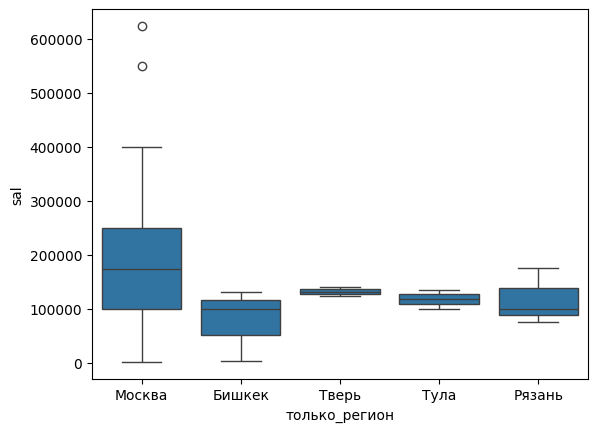

In [7]:
df['только_регион'] = df['регион'].map(lambda x: x[:x.find(',')] if (x and ',' in x) else x)
sns.boxplot(data=df.loc[df['только_регион'].isin(['Москва', 'Тула', 'Бишкек', 'Рязань', 'Тверь'])], y='sal', x='только_регион')

<Axes: xlabel='навыки_list', ylabel='sal'>

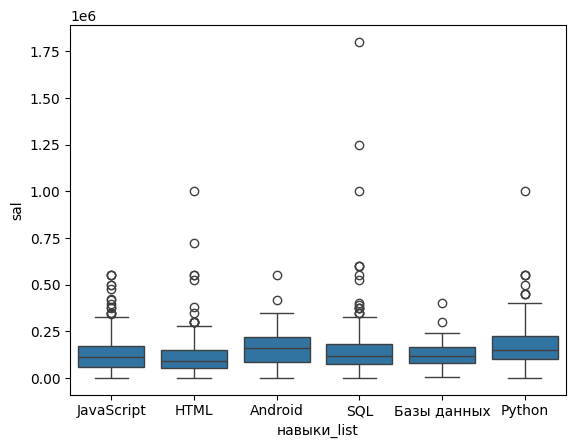

In [8]:
import json
df['навыки_list'] = df['навыки'].str.replace('\'', '\"')
df['навыки_list'] = df['навыки_list'].str.replace('\\xa0',  ' ')
df['навыки_list'] = df['навыки_list'].map(json.loads)
df_skils = df.explode('навыки_list').reset_index(drop=True).copy()
sns.boxplot(data=df_skils.loc[df_skils['навыки_list'].isin(['JavaScript', 'HTML', 'Python', 'Базы данных', 'Android', 'SQL'])], y='sal', x='навыки_list')

In [9]:
df_no_nan = df[['exp', 'sal']].dropna().copy()
corr, p_corr = pearsonr(df_no_nan['exp'], df_no_nan['sal'])
if p_corr < 0.05:
    print('Зависимость между опытом и зп статистически значима')
contingency_table = pd.crosstab(df['только_регион'], df['занятость'])
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
if p_chi2 < 0.05:
    print('Зависимость между регионом и занятостью статистически значима')

Зависимость между опытом и зп статистически значима
Зависимость между регионом и занятостью статистически значима


In [10]:
need_find = ['senior', 'ведущий', 'старший']
df['is_senior'] = df['название'].map(lambda name: True if name and any(word in name.lower() for word in need_find) else False)
salary_data = df[['sal', 'is_senior']].dropna().copy()

senior_salaries = salary_data[salary_data['is_senior'] == True]['sal']
non_senior_salaries = salary_data[salary_data['is_senior'] == False]['sal']
t_stat, p_ttest = ttest_ind(senior_salaries, non_senior_salaries, equal_var=False)
if p_ttest < 0.05:
    print('Зависимость между зп и грейдом статистически значима')

Зависимость между зп и грейдом статистически значима


In [11]:
np.random.seed(42)
n_rows = 1_000_000
data = pd.DataFrame({
    'пол': np.random.choice(['М', 'Ж'], size=n_rows),
    'возраст': np.random.normal(35, 10, n_rows).astype(int).clip(18, 80),
    'доход': np.random.normal(50000, 20000, n_rows).astype(int).clip(10000, 200000),
    'профессия': np.random.choice(['IT', 'Медицина', 'Образование', 'Строительство'], 
                                 size=n_rows, p=[0.3, 0.25, 0.25, 0.2])
})

In [12]:
data.info(memory_usage='deep')
print(f"\nМетод memory_usage():")
print(f'Метод memory_usage {data.memory_usage(deep=True)}')
print(f'Общий объем памяти: {data.memory_usage(deep=True).sum() / 1024**2} MB')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   пол        1000000 non-null  object
 1   возраст    1000000 non-null  int64 
 2   доход      1000000 non-null  int64 
 3   профессия  1000000 non-null  object
dtypes: int64(2), object(2)
memory usage: 181.0 MB

Метод memory_usage():
Метод memory_usage Index             128
пол          84000000
возраст       8000000
доход         8000000
профессия    89801982
dtype: int64
Общий объем памяти: 181.00939750671387 MB


In [13]:
print("Запись в CSV:\n")
%timeit data.to_csv('million_rows.csv', index=False)
print("Чтение из CSV:\n")
%timeit df_loaded = pd.read_csv('million_rows.csv')
df_loaded = pd.read_csv('million_rows.csv')
print(f"Загружено строк: {len(df_loaded)}")

Запись в CSV:

3.17 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Чтение из CSV:

721 ms ± 56.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Загружено строк: 1000000


In [14]:
print("Средний возраст:\n")
%timeit data['возраст'].mean()

print("Максимальный доход:\n")
%timeit data['доход'].max()

print("Самый частый пол:\n")
%timeit data['пол'].mode().iloc[0]

print("Самый редкий тип профессии:\n")
%timeit data['профессия'].value_counts().idxmin()

avg_age = data['возраст'].mean()
max_income = data['доход'].max()
most_common_gender = data['пол'].mode().iloc[0]
rarest_profession = data['профессия'].value_counts().idxmin()

print(f"Средний возраст: {avg_age:.1f} лет")
print(f"Максимальный доход: {max_income} руб.")
print(f"Самый частый пол: {most_common_gender}")
print(f"Самый редкий тип профессии: {rarest_profession}")

Средний возраст:

2.93 ms ± 215 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Максимальный доход:

3.15 ms ± 838 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Самый частый пол:

114 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Самый редкий тип профессии:

119 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Средний возраст: 34.7 лет
Максимальный доход: 146552 руб.
Самый частый пол: М
Самый редкий тип профессии: Строительство
